In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

fname='dataset_liver_bmodes_steatosis_assessment_IJCARS.csv.mat'
mat=scipy.io.loadmat(fname)

In [ ]:
con_list = [[element for element in upperElement] for upperElement in mat['data']]
newData = list((con_list[0]))

In [ ]:
id,classes,fat,images=[],[],[],[]
for i in range(len(con_list[0])):
    for j in range(len(con_list[0][i][3])):
        id.append(con_list[0][i][0])
        classes.append(con_list[0][i][1][0][0])
        fat.append(con_list[0][i][2][0][0])
        images.append(con_list[0][i][3][j])


In [ ]:
img=[]
for i in images:
    i=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img.append(i[:380, 20:600])

In [ ]:
df=pd.DataFrame()
df['id']=pd.Series(id)
df['class']=pd.Series(classes)
df['fat']=pd.Series(fat)
df['images']=list(img)

In [ ]:
img[0].shape

(380, 580, 3)

In [ ]:
df.head()

,id,class,fat,images
0,[[1]],0,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,[[1]],0,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,[[1]],0,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,[[1]],0,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,[[1]],0,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [ ]:
df.to_csv("Dataset_Liver.csv")


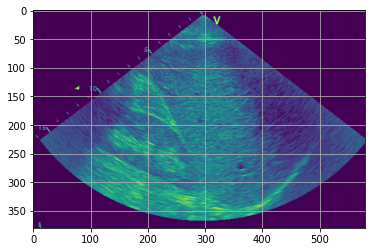

In [ ]:
for i in img:
    k=i
    plt.imshow(i)
    plt.grid(None)
    plt.show()
    break

In [ ]:
# color = ('b','g','r')
# for i,col in enumerate(color):
#     histr = cv2.calcHist([k],[i],None,[256],[0,256])
#     plt.plot(histr,color = col)
#     plt.xlim([0,256])
# plt.show()

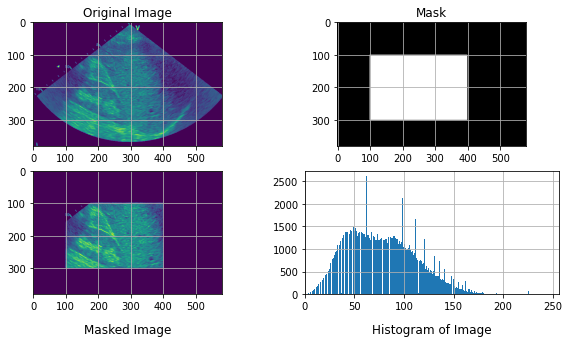

In [ ]:
mask = np.zeros(k.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(k,k,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
# hist_full = cv2.calcHist([k],[0],None,256,[1,256])
# hist_mask = cv2.calcHist([k],[0],mask,256,[1,256])

plt.figure(figsize=(10,5))
plt.subplot(221), plt.imshow(k)
plt.title('Original Image')
plt.grid(None)
plt.subplot(222), plt.imshow(mask,'gray')
plt.title('Mask')
plt.grid(None)
plt.subplot(223), plt.imshow(masked_img)
plt.title('Masked Image',y=-0.2, pad=-14)

plt.grid(None)
plt.subplot(224), plt.hist(k.ravel(),256,[1,256])
plt.title('Histogram of Image',y=-0.2, pad=-14)
plt.grid(None)
plt.xlim([0,256])
plt.show()

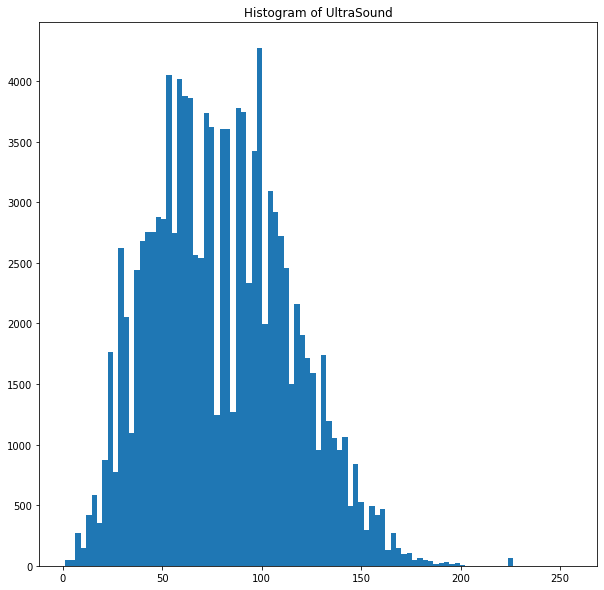

In [ ]:
plt.figure(figsize=(10,10))
# hist,bins = np.histogram(k.ravel(),1,[0,10])
plt.hist(k.ravel(),95,[1,256])
plt.title("Histogram of UltraSound")
plt.show()


In [ ]:
df=pd.read_csv("Dataset_Liver.csv")
df.head()
df.shape

(550, 5)

In [ ]:
X=df.images
Y=df[['fat','class']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(img,Y,train_size=0.8)
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN,InputLayer,BatchNormalization,MaxPool2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Input
from keras.preprocessing.image import ImageDataGenerator

0
1
2
3


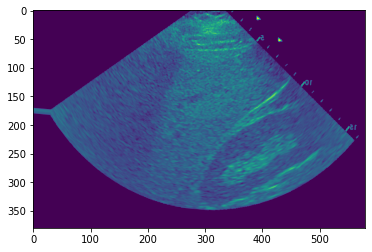

In [ ]:
y_temp=[y_train[0]]
x_temp=np.asarray([x_train[0]])
x_temp = x_temp.reshape((x_temp.shape[0],380, 580,1 ))
datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])
i=0
t=[]
for x,y in datagen.flow(x_temp,y_temp,shuffle=True):
    plt.imshow(x[0])
    t.append(x[0])
    print(i)
    i+=1
    if(i==4):
        break

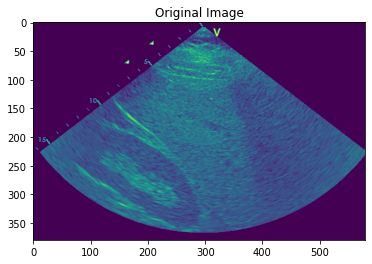

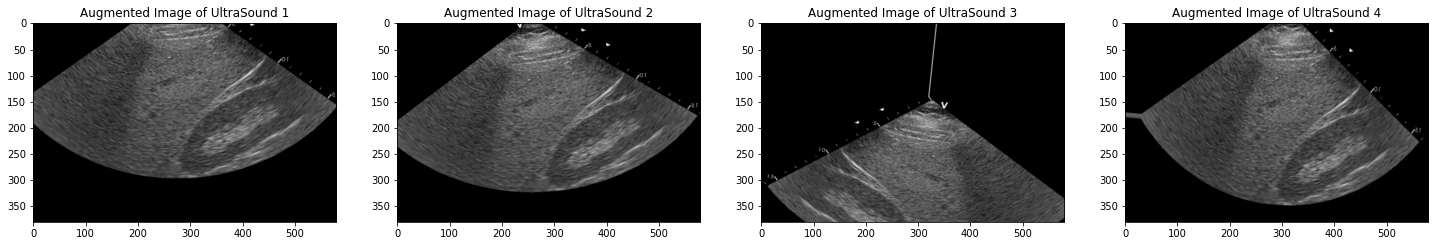

In [ ]:
plt.imshow(x_temp[0])
plt.title('Original Image')
plt.show()

fig,ax=plt.subplots(1,4,figsize=(25,5))
for i in range(len(t)):
    ax[i].set_title('Augmented Image of UltraSound '+str(i+1))
    ax[i].imshow(t[i],'gray')
plt.show()

In [ ]:
x_train.shape

(440, 380, 580)

In [ ]:

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2],1 ))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2],1 ))
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(434,636,1)))
model.add(MaxPool2D(2,2))
#adding fully connected layer
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPool2D(2,2))

# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPool2D(2,2))

# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPool2D(2,2))

model.add(Flatten())
#adding output layer
model.add(Dense(2))
#compiling the model
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train,y_train,batch_size=8,seed=27,shuffle=False),validation_data = (np.asarray(x_test),np.asarray(y_test)),epochs=15,batch_size=8,verbose=2)

In [ ]:
_, train_acc = model.evaluate(np.asarray(x_train),np.asarray(y_train), verbose=0)
_, test_acc = model.evaluate(np.asarray(x_test),np.asarray(y_test), verbose=0)

In [ ]:
train_acc

0.9636363387107849

In [ ]:
def plot_auc_loss(history, epochs):
    tloss = history.history['loss']
    tauc = history.history['accuracy']

    vloss = history.history['val_loss']
    vauc = history.history['val_accuracy']

    Epochs = [i for i in range(epochs)]

    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    axes[0].plot(Epochs, tloss, 'r', label='Training loss')
    axes[0].plot(Epochs, vloss, 'g', label='Validation loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()

    axes[1].plot(Epochs, tauc, 'r', label='Training AUC')
    axes[1].plot(Epochs, vauc, 'g', label='Validation AUC')
    axes[1].set_title('Training and Validation AUC')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('AUC', fontsize=18)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return Epochs

Epochs = plot_auc_loss(history, 3)

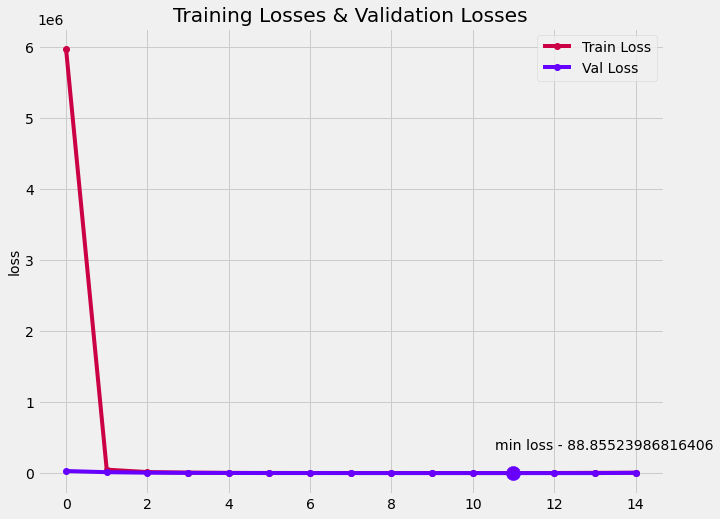

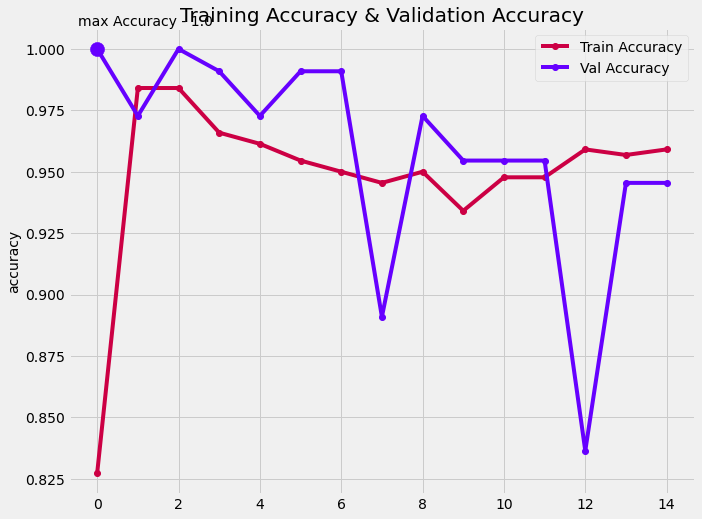

In [ ]:
def plotLoss(history, name = 'loss'):
    plt.figure(figsize=(10,8))
    
    epochs = len(history[name])
    
    plt.plot(np.arange(epochs),history[name],'-o',label='Train Loss',color='#cc0044')
    plt.plot(np.arange(epochs),history[f'val_{name}'],'-o',label='Val Loss',color='#6600ff')

    x_ = np.argmin(history[f'val_{name}'] ); y_ = np.min( history[f'val_{name}'] )

    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]

    plt.scatter(x_,y_,s=200,color='#6600ff'); plt.text(x_-0.03*xdist,y_+0.05*ydist,f'min loss - {y_}',size=14)

    plt.ylabel(name,size=14)
    plt.title(f'Training Losses & Validation Losses')
    plt.legend()

    plt.show()

def plotaccuracy(history, name = 'accuracy'):
    plt.figure(figsize=(10,8))
    
    epochs = len(history[name])
    
    plt.plot(np.arange(epochs),history[name],'-o',label='Train Accuracy',color='#cc0044')
    plt.plot(np.arange(epochs),history[f'val_{name}'],'-o',label='Val Accuracy',color='#6600ff')

    x_ = np.argmax(history[f'val_{name}'] ); y_ = np.max( history[f'val_{name}'] )

    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]

    plt.scatter(x_,y_,s=200,color='#6600ff'); plt.text(x_-0.03*xdist,y_+0.05*ydist,f'max Accuracy - {y_}',size=14)

    plt.ylabel(name,size=14)
    plt.title(f'Training Accuracy & Validation Accuracy')
    plt.legend()

    plt.show()
plotLoss(history.history)
plotaccuracy(history.history,'accuracy')
